# Practica 3


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns
from scipy.integrate import quad

In [173]:
plt.rcParams.update(
    {
        "grid.color": "gray",
        "grid.linestyle": "--",
        "grid.alpha": 0.7,
        "axes.facecolor": "whitesmoke",
        "axes.labelsize": 12,
        "axes.labelweight": "bold",
        "axes.labelcolor": "navy",
        "axes.titlesize": 14,
        "axes.titleweight": "bold",
        "axes.titlecolor": "navy",
        "xtick.color": "black",
        "ytick.color": "black",
        "legend.fontsize": 10,
        "legend.frameon": False,
        "figure.autolayout": True,
    }
)

## 1. La estructura de la funcion de costo epistemica


$$ P(\text{Hipotesis, Datos }= \{d_1,d_2, ...\}) = P(\text{Hipotesis}) P(d_1|\text{Hipotesis}) P(d_2|d_1\text{Hipotesis}) ... $$


- Variables del problema de apuestas.

Recompensas:
$$ Q_c = 3, Q_s= 1,2$$

Proporcion de las apuestas:
$$ B_c = b \text{ y } B_s = 1-b$$

Recursos iniciales: $w_0$

Recursos en la ronda i: $w_i$


### 1.1 Calcular la esperanza de los recursos en los primeros dos pasos temporales con b=0.5


In [174]:
from itertools import product


# cara = 1, sello = 0
def Wb_datos(b, datos, w0=1, Qc=3, Qs=1.2):

    for d in datos:
        if d:
            w0 = w0 * b * Qc
        else:
            w0 = w0 * (1 - b) * Qs

    return w0


def Wb_datos(b, datos, w0=1, Qc=3, Qs=1.2, steps=False):
    if not steps:

        for d in datos:
            if d:
                w0 = w0 * b * Qc
            else:
                w0 = w0 * (1 - b) * Qs

        return w0

    if steps:
        output = [w0]

        for d in datos:
            if d:
                w0 = w0 * b * Qc
            else:
                w0 = w0 * (1 - b) * Qs

            output.append(w0)
        return output


def esperanza_Wb_datos(b, steps, w0=1, Qc=3, Qs=1.2):

    # todos las combinaciones son equiprobables
    combinaciones = 2**steps
    probabilidad = 1 / combinaciones

    output = 0
    for data in product([0, 1], repeat=steps):
        output += probabilidad * Wb_datos(b, data, w0, Qc, Qs)

    return output

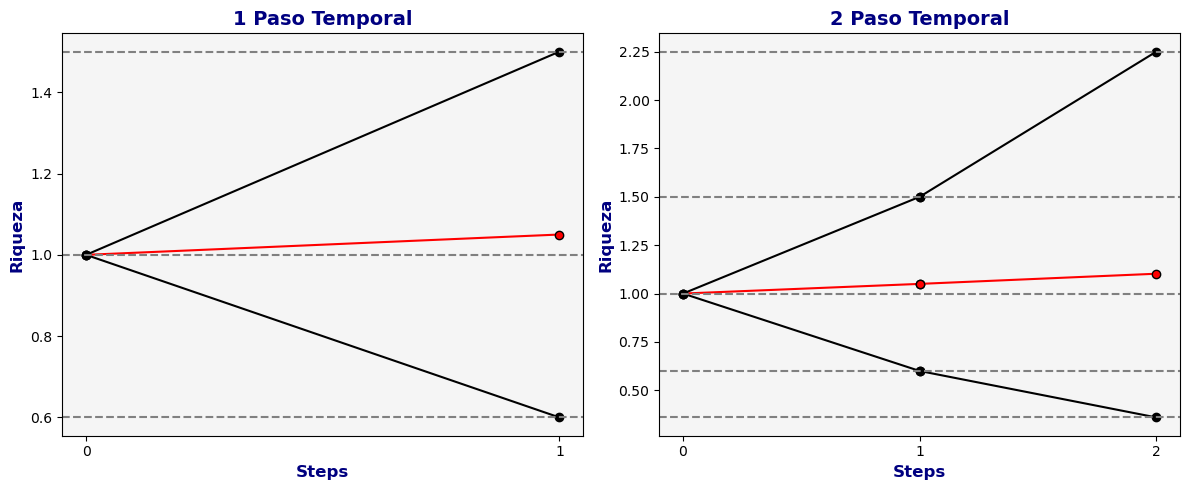

In [175]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

m0 = 1

axs[0].plot(
    [0, 1],
    [m0, esperanza_Wb_datos(0.5, 1)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[0].plot(
    [0, 1], [m0, Wb_datos(0.5, [1])], color="black", marker="o", markeredgecolor="black"
)
axs[0].plot(
    [0, 1], [m0, Wb_datos(0.5, [0])], color="black", marker="o", markeredgecolor="black"
)

axs[0].axhline(Wb_datos(0.5, [1]), color="gray", linestyle="--")
axs[0].axhline(1.0, color="gray", linestyle="--")
axs[0].axhline(Wb_datos(0.5, [0]), color="gray", linestyle="--")
axs[0].set_xticks([0, 1])

axs[0].set_title("1 Paso Temporal")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Riqueza")

# Segundo plot

axs[1].plot(
    [0, 1],
    [m0, esperanza_Wb_datos(0.5, 1)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [0, 1], [m0, Wb_datos(0.5, [1])], color="black", marker="o", markeredgecolor="black"
)
axs[1].plot(
    [0, 1], [m0, Wb_datos(0.5, [0])], color="black", marker="o", markeredgecolor="black"
)

axs[1].plot(
    [1, 2],
    [esperanza_Wb_datos(0.5, 1), esperanza_Wb_datos(0.5, 2)],
    color="red",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [1, 2],
    [Wb_datos(0.5, [1]), Wb_datos(0.5, [1, 1])],
    color="black",
    marker="o",
    markeredgecolor="black",
)
axs[1].plot(
    [1, 2],
    [Wb_datos(0.5, [0]), Wb_datos(0.5, [0, 0])],
    color="black",
    marker="o",
    markeredgecolor="black",
)

axs[1].axhline(1.0, color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [1]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [0]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [1, 1]), color="gray", linestyle="--")
axs[1].axhline(Wb_datos(0.5, [0, 0]), color="gray", linestyle="--")

axs[1].set_xticks([0, 1, 2])

axs[1].set_title("2 Paso Temporal")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Riqueza")

plt.tight_layout()

### 1.2. Simular 10000 personas, y graficar el promedio de sus recursos en los primeros 10 pasos temporales.


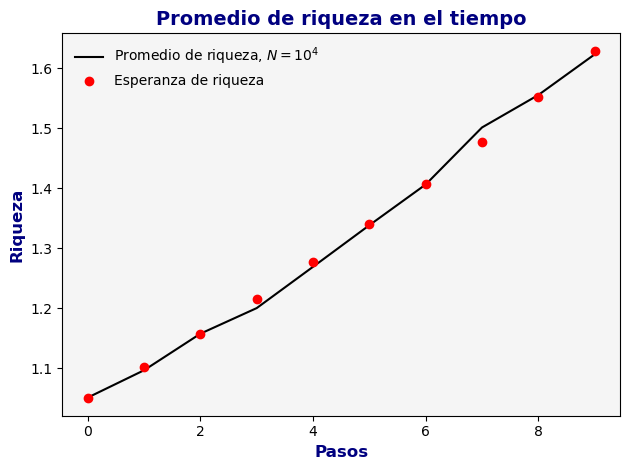

In [176]:
np.random.seed(211)

random_sample = [st.bernoulli.rvs(0.5, size=10) for _ in range(10000)]
average_over_sample_i = [
    np.mean([Wb_datos(0.5, sample[: i + 1]) for sample in random_sample])
    for i in range(10)
]

plt.plot(
    np.arange(0, 10),
    average_over_sample_i,
    color="black",
    label="Promedio de riqueza, $N=10^4$",
)
plt.plot(
    np.arange(0, 10),
    [esperanza_Wb_datos(0.5, i + 1) for i in range(10)],
    color="red",
    label="Esperanza de riqueza",
    linestyle="",
    marker="o",
)

plt.legend()
plt.xlabel("Pasos")
plt.ylabel("Riqueza")
plt.title("Promedio de riqueza en el tiempo")
plt.tight_layout()

### 1.3 Graficar como se actualizan los recursos con el tiempo con una apuesta determinada


C:\Users\Damm\AppData\Local\Temp\ipykernel_7072\594489149.py:10: RuntimeWarning: divide by zero encountered in log
  log_wi = np.log(Wb_datos(b_test, data, steps=True))


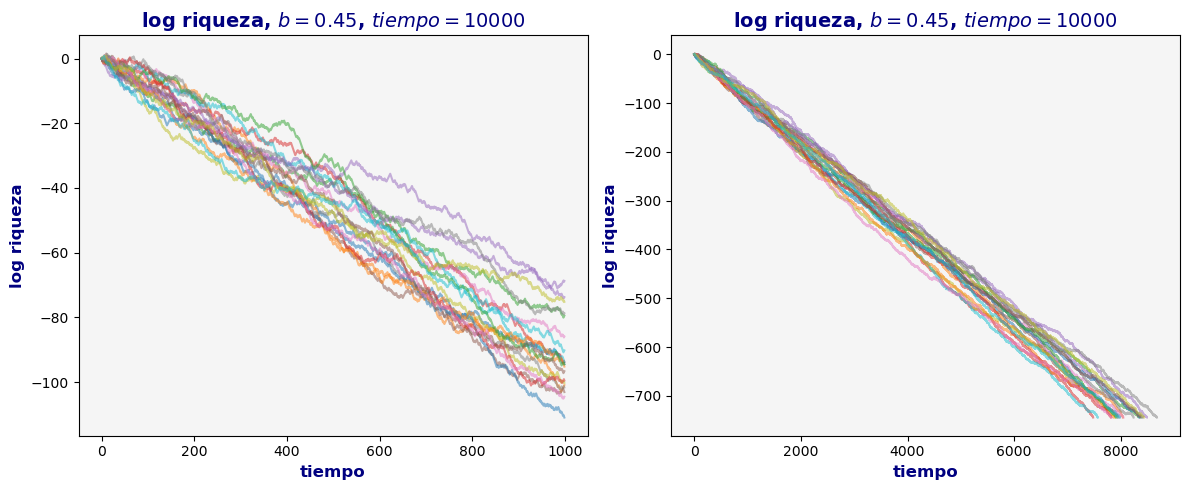

In [177]:
b_test = 0.45
steps = 10000
steps_plot1 = 1000


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i in range(20):
    data = st.bernoulli.rvs(b_test, size=steps)
    log_wi = np.log(Wb_datos(b_test, data, steps=True))
    axs[0].plot(log_wi[0:steps_plot1], alpha=0.5)
    axs[1].plot(log_wi, alpha=0.5)

axs[0].set_title(f"log riqueza, $b={b_test}$, $tiempo = {steps}$")
axs[0].set_xlabel("tiempo")
axs[0].set_ylabel("log riqueza")
axs[1].set_title(f"log riqueza, $b={b_test}$, $tiempo = {steps}$")
axs[1].set_xlabel("tiempo")
axs[1].set_ylabel("log riqueza")

plt.tight_layout()

### 1.4 Graficar la tasa de crecimiento temporal (lımT →∞) de los recursos para cada apuesta alternativa b.


Cuando $T \rightarrow \infty$, $n_c = n_s = 0.5 T$. Es decir las frecuencias de los eventos observados converge a la probabilidad de los eventos.

Queda entonces que $w_T(b) = w_0 (bQ_c)^{0.5T}((1-b)Q_s)^{0.5T}$

y $r(b) = w_0 (bQ_c)^{0.5}((1-b)Q_s)^{0.5}$


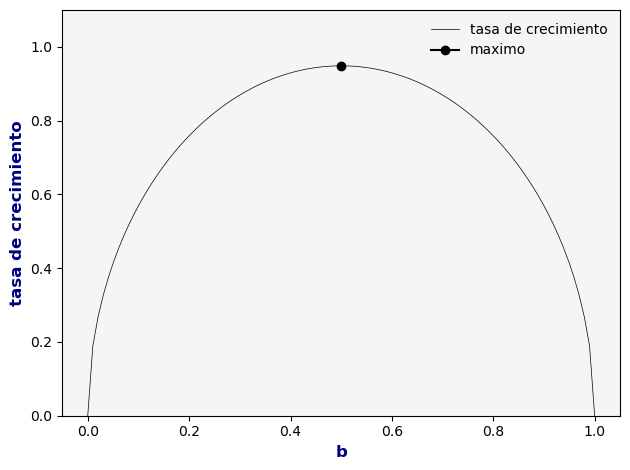

In [178]:
r = lambda x: (3 * 1.2 * x * (1 - x)) ** 0.5
x = np.linspace(0, 1, 100)

plt.plot(x, r(x), c="black", label="tasa de crecimiento", linewidth=0.5)
plt.plot(0.5, r(0.5), marker="o", c="black", label="maximo")
plt.ylim(0, 1.1)
plt.xlabel("b")
plt.ylabel("tasa de crecimiento")
plt.legend()

### 1.5 Buscar la apuesta que maximiza los recursos si se modifica el pago que ofrece la casa de apuestas.


$w_T(b) = w_0 (bQ_c)^{0.5T}((1-b)Q_s)^{0.5T}$, cuando $T\rightarrow \infty$

Se puede observar que la expresion es proporcional a un termino $ w_t(b) \sim (\sqrt{b(1-b)})^T$ que tiene un maximo en $b=0.5$ y un minimo en $b=0$ y $b=1$. Vale la pena observar que la tasa de crecimiento depende del valor de $Q_c$ y $Q_s$, pero la apuesta optima es siempre $b=0.5$.


### 1.6 Calcular analiticamente la diferencia de desempeño de dos apuestas b y d dado unos pagos fijos $Q_s$ y $Q_c$.


Simplicando la expresion en 1.6 queda que $$ \frac{w_t(b)}{w_t(d)} = (\frac{b}{d})^{n_c} (\frac{(1-b)}{(1-d)})^{n_s}$$ se puede observar que la diferencia en performance relativa a dos apuestas $b$ y $d$ no depende de los pagos $Q_c$ y $Q_s$.


### 1.7. Calcular la diferencia de las tasas de crecimiento de dos apuestas b y d a largo plazo (limT →∞) expresado en escala logaritmica.


- Continuando de la expresion en 1.7, cuando $T\rightarrow \infty$

$$ \frac{r(b)}{r(d)} = (\frac{b}{d}\frac{(1-b)}{(1-d)})^{0.5}$$

Aplicando logaritmo

$$ log(r(b)) - log(r(d)) = 0.5(log(b) - log(d) + log(1-b) - log(1-d))$$

Viendo la ecuacion se puede ver que agrupando los terminos tiene la forma $-\sum_{i} p_i \log q_i$, que se corresponde con la expresion de la entropia cruzada $H(P, Q) = -\sum_{i} p_i \log q_i$

$$ log(r(b)) - log(r(d)) = H(P, Q_b) - H(P, Q_d)$$

sumando y restando la entropia $H(P)$ y simplificando.

$$ log(r(b)) - log(r(d)) = H(P, Q*b) - H(P, Q_d) + H(P) - H(P) = -D*{KL}(P||Q*b) + D*{KL}(P||Q_d)$$

se puede ver que la diferencia en la tasa logaritmica de retornos es igual a la diferencia de la divergencia KL entre las distribuciones de probabilidad $P$ y $Q$ de las apuestas $b$ y $d$ respectivamente.

Si asumimos que d = 0.5, la apuesta optima. Entonces $D_{KL}(P||Q_d) = 0$ y $ log(r(b)) - log(r(0.5)) = -D\_{KL}(P||Q_b)$, lo cual deja explicito que la divergencia KL representa la diferencia de retornos logaritimica de una apuesta $b$ y la apuesta optima.


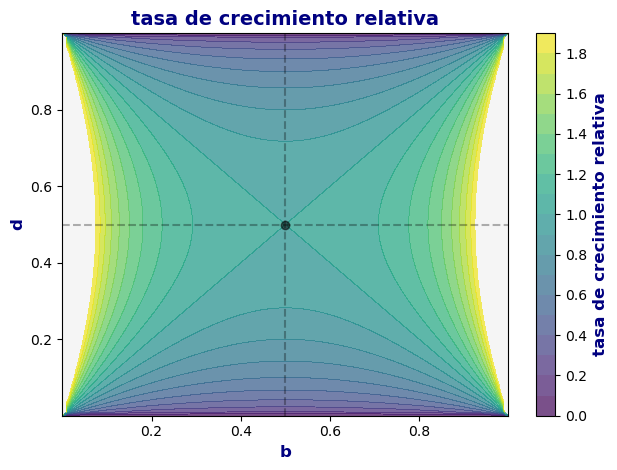

In [180]:
epsilon = 1e-6
_range = np.linspace(0 + epsilon, 1 - epsilon, 100)


def rb_rd(b, d):
    return np.sqrt((b * (1 - b)) / (d * (1 - d)))


matrix = np.array([[rb_rd(b, d) for d in _range] for b in _range])

plt.contourf(
    _range,
    _range,
    matrix,
    levels=np.arange(0, 2, 0.1),
    cmap="viridis",
    alpha=0.7,
)
plt.colorbar(label="tasa de crecimiento relativa")
plt.title("tasa de crecimiento relativa")
plt.xlabel("b")
plt.ylabel("d")

plt.axhline(0.5, color="black", linestyle="--", alpha=0.3)
plt.axvline(0.5, color="black", linestyle="--", alpha=0.3)
plt.scatter(0.5, 0.5, color="black", marker="o", alpha=0.3)
plt.scatter(0.5, 0.5, color="black", marker="o", alpha=0.3)

### 1.8. ¿Cuando se maximiza la tasa de crecimiento a largo plazo?


Por lo mencionado en 1.7, maximizar la tasa de crecimiento logaritmica seria lo mismo que encontrar el parametro $b$ que minimize la entropia cruzada.

$$
\text{arg max}_b\ log(r(b)) =
\text{arg max}_b\ \left[ p \log b + (1 - p) \log(1 - b) \right]
$$

derivando con respecto a b e igualando a cero para buscar el maximo

$$
\frac{d}{db} \left[ p \log b + (1 - p) \log(1 - b) \right] = \frac{p}{b} - \frac{1 - p}{1 - b} = 0 \Rightarrow b = p = 0.5
$$

La relacion con la entropia ocurre ya que elegir b de manera que se maximiza la tasa logaritimica de crecimiento, la entropia cruzada $H(P, Q_b)$ se minimiza. es decir $ H(P, Q_b) = H(P)$ solo si $P = Q_b$ y por lo tanto b = p.


## 2. Evaluacion de procedimientos alternativos de medicion independientes.


### 2.1 Hui-Walter. Evaluacion de instrumentos de medicion independientes.


Definiciones del modelo:

- Resultado sobre N pacientes: $r = (n_0, n_1, n_2, n_3)$ = (--, -+, +-, ++)

- Probabilidad de diagnostico positivo y negativo: $q_i = (q_0, q_1, q_2, q_3)$

- Sensibilidad: $s_i$, Especificidad: $x_i$ con i representando el test

- Prevalencia de la enfermedad $p_i$ con i representando la comunidad

- Probabilidad de $q_i$:

$$q_0 = p_c (1 - s_a) (1 - s_b) + (1 - p_c) x_a x_b$$  
$$q_1 = p_c (1 - s_a) s_b + (1 - p_c) x_a (1 - x_b)$$
$$q_2 = p_c s_a (1 - s_b) + (1 - p_c) (1 - x_a) x_b$$  
$$q_3 = p_c s_a s_b + (1 - p_c) (1 - x_a) (1 - x_b)$$

- Probabilidad de los resultados sobre una poblacion de N pacientes:

  $P(r_c|q_c, N_c) = Multinomial(r_c|q_c, N_c)$

- Distribuciones a priori de la sensibilidad, especificida y prevalencia.

$$p(p_c) = Beta(p_c|\alpha_p, \beta_p)$$
$$p(s_t) = Beta(s_t|\alpha_s, \beta_s)$$
$$p(x_t) = Beta(x_t|\alpha_x, \beta_x)$$


#### 2.1.1 Generacion de datos sinteticos


In [17]:
## para dos tests sobre 5 comunidades
np.random.seed(22)
# personas por comunidad
N = 1000

# ground truth
prevalencia = np.array([0, 0.15, 0.3, 0.45, 0.7])
sensibilidad = np.array([0.9, 0.6])
especificidad = np.array([0.95, 0.9])

# Simular datos para el modelo Hui-Walter
resultados = []
for p_c in prevalencia:
    q0 = (
        p_c * (1 - sensibilidad[0]) * (1 - sensibilidad[1])
        + (1 - p_c) * especificidad[0] * especificidad[1]
    )
    q1 = p_c * (1 - sensibilidad[0]) * sensibilidad[1] + (1 - p_c) * especificidad[
        0
    ] * (1 - especificidad[1])
    q2 = (
        p_c * sensibilidad[0] * (1 - sensibilidad[1])
        + (1 - p_c) * (1 - especificidad[0]) * especificidad[1]
    )
    q3 = p_c * sensibilidad[0] * sensibilidad[1] + (1 - p_c) * (
        1 - especificidad[0]
    ) * (1 - especificidad[1])

    # Distribución multinomial para los resultados
    resultados.append(np.random.multinomial(N, [q0, q1, q2, q3]))

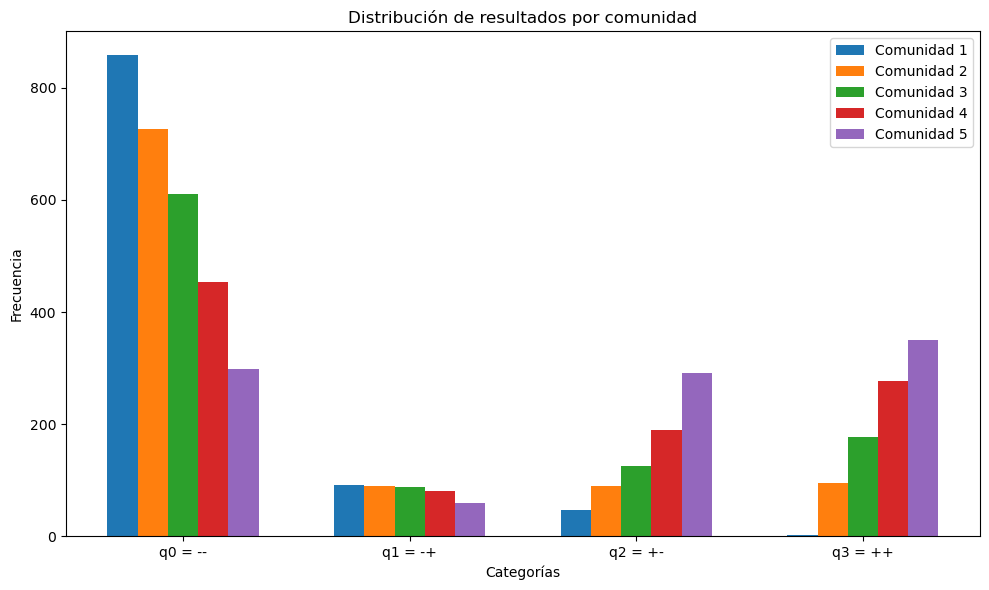

In [ ]:
categorias = ["q0 = --", "q1 = -+", "q2 = +-", "q3 = ++"]
x = np.arange(len(categorias)) * 1.5

figura, eje = plt.subplots(figsize=(10, 6))

for indice, resultado_comunidad in enumerate(resultados):
    eje.bar(
        x + indice * 0.2, resultado_comunidad, width=0.2, label=f"Comunidad {indice+1}"
    )

eje.set_xticks(x + 0.4)
eje.set_xticklabels(categorias)
eje.set_xlabel("Categorías")
eje.set_ylabel("Frecuencia")
eje.set_title("Distribución de resultados por comunidad")
eje.legend()

plt.tight_layout()
plt.show()

#### 2.1.2 Realizar inferencia mediante algun PPL


In [23]:
import pymc as pm
import arviz as az

In [41]:
with pm.Model() as hui_walter_model:
    # Priors para prevalencia, sensibilidad y especificidad
    prevalencia = pm.Beta(
        "prevalencia", alpha=1, beta=1, shape=5, initval=[0.5] * 5
    )  # Una para cada comunidad
    sensibilidad = pm.Beta(
        "sensibilidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test
    especificidad = pm.Beta(
        "especificidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test

    # Probabilidades de las categorías en funcion de la prevalencia, sensibilidad y especificidad
    q0 = (
        prevalencia * (1 - sensibilidad[0]) * (1 - sensibilidad[1])
        + (1 - prevalencia) * especificidad[0] * especificidad[1]
    )
    q1 = prevalencia * (1 - sensibilidad[0]) * sensibilidad[1] + (
        1 - prevalencia
    ) * especificidad[0] * (1 - especificidad[1])
    q2 = (
        prevalencia * sensibilidad[0] * (1 - sensibilidad[1])
        + (1 - prevalencia) * (1 - especificidad[0]) * especificidad[1]
    )
    q3 = prevalencia * sensibilidad[0] * sensibilidad[1] + (1 - prevalencia) * (
        1 - especificidad[0]
    ) * (1 - especificidad[1])

    q = pm.Deterministic("q", pm.math.stack([q0, q1, q2, q3], axis=1))

    # Observaciones
    observaciones = pm.Multinomial(
        "observaciones", n=N, p=q, observed=np.array(resultados)
    )

In [42]:
hui_walter_model

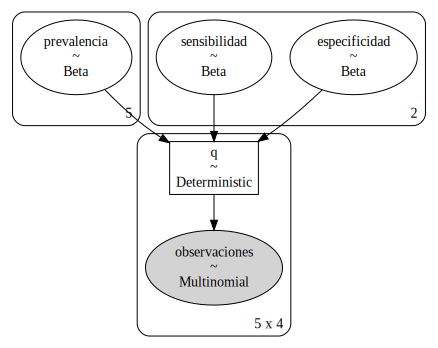

In [43]:
pm.model_to_graphviz(hui_walter_model)

In [44]:
with hui_walter_model:
    trace = pm.sample(
        1000,
        return_inferencedata=True,
        target_accept=0.95,
    )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prevalencia, sensibilidad, especificidad]


c:\Users\Damian\miniconda3\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 66 seconds.


#### 2.1.3 Diagnosticar si el motor de inferencia funciona correctamente


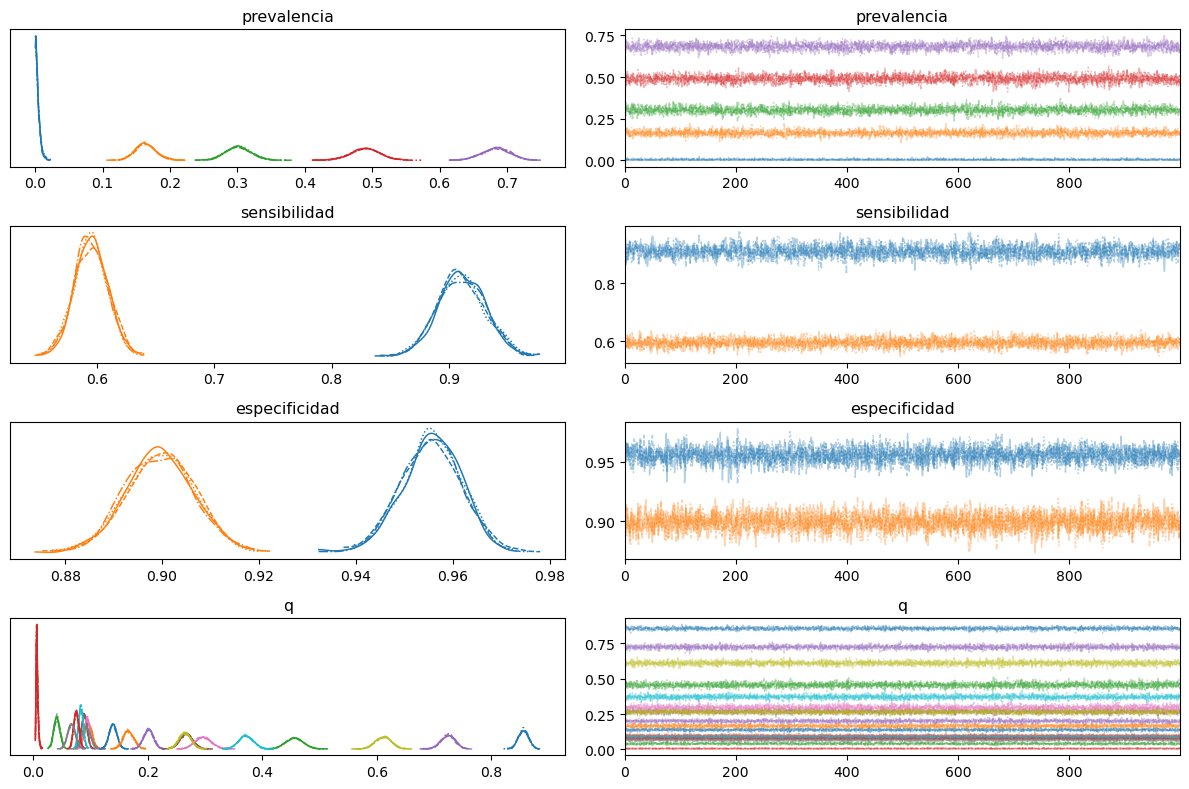

In [48]:
# Se puede ver a simple vista que las distribuciones de las 4 trazas son similares y que las trazas en si misma
# parecen ser estacionarias.

az.plot_trace(trace, combined=False)
plt.tight_layout()

In [ ]:
# psrf = r_hat = 1.0 para todos los parametros  // estimacion de la varianza entre cadenas vs varianza intra cadena
# SSeff = ess_bulk, ess_tail > 2000  //  sample size efectivo en el bulk y la cola de la distribucion
az.summary(trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
prevalencia[0],0.004,0.003,0.000,0.011,0.0,0.0,2989.0,1720.0,1.0
prevalencia[1],0.164,0.015,0.134,0.194,0.0,0.0,3207.0,2690.0,1.0
prevalencia[2],0.301,0.018,0.266,0.337,0.0,0.0,2955.0,3100.0,1.0
prevalencia[3],0.490,0.021,0.449,0.532,0.0,0.0,2744.0,2121.0,1.0
prevalencia[4],0.684,0.021,0.644,0.724,0.0,0.0,2509.0,2684.0,1.0
sensibilidad[0],0.911,0.020,0.874,0.953,0.0,0.0,1982.0,2093.0,1.0
sensibilidad[1],0.595,0.014,0.567,0.623,0.0,0.0,3055.0,2791.0,1.0
especificidad[0],0.956,0.006,0.943,0.967,0.0,0.0,3035.0,1942.0,1.0
especificidad[1],0.900,0.007,0.886,0.913,0.0,0.0,2377.0,2872.0,1.0
"q[0, 0]",0.856,0.009,0.840,0.873,0.0,0.0,2701.0,2898.0,1.0


In [63]:
prevalencia_inferida = trace.posterior["prevalencia"].mean(dim=["chain", "draw"])
sensibilidad_inferida = trace.posterior["sensibilidad"].mean(dim=["chain", "draw"])
especificidad_inferida = trace.posterior["especificidad"].mean(dim=["chain", "draw"])

hdi_prevalencia = az.hdi(trace, var_names="prevalencia", hdi_prob=0.95)["prevalencia"]
hdi_sensibilidad = az.hdi(trace, var_names="sensibilidad", hdi_prob=0.95)[
    "sensibilidad"
]
hdi_especificidad = az.hdi(trace, var_names="especificidad", hdi_prob=0.95)[
    "especificidad"
]

valores_reales_prevalencia = np.array([0, 0.15, 0.3, 0.45, 0.7])
valores_reales_sensibilidad = np.array([0.9, 0.6])
valores_reales_especificidad = np.array([0.95, 0.9])

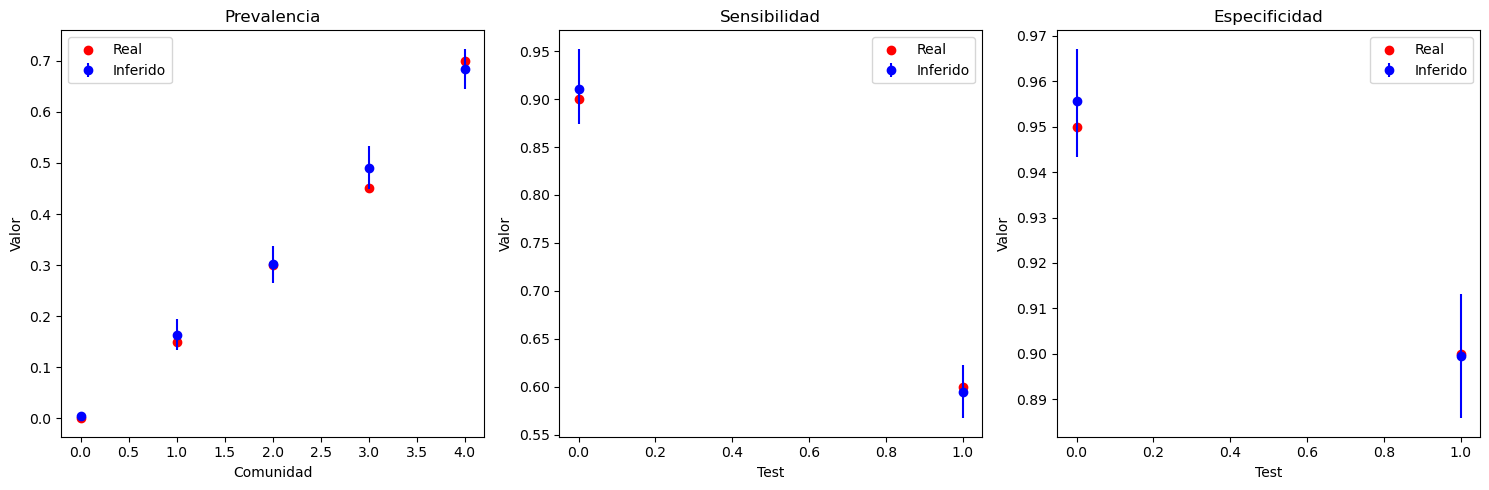

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Comparacion de estimaciones", fontsize=16)

# Prevalencia
axs[0].errorbar(
    range(len(prevalencia_inferida)),
    prevalencia_inferida,
    yerr=[
        prevalencia_inferida - hdi_prevalencia[:, 0],
        hdi_prevalencia[:, 1] - prevalencia_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[0].scatter(
    range(len(valores_reales_prevalencia)),
    valores_reales_prevalencia,
    color="red",
    label="Real",
)
axs[0].set_title("Prevalencia")
axs[0].set_xlabel("Comunidad")
axs[0].set_ylabel("Valor")
axs[0].legend()

# Sensibilidad
axs[1].errorbar(
    range(len(sensibilidad_inferida)),
    sensibilidad_inferida,
    yerr=[
        sensibilidad_inferida - hdi_sensibilidad[:, 0],
        hdi_sensibilidad[:, 1] - sensibilidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[1].scatter(
    range(len(valores_reales_sensibilidad)),
    valores_reales_sensibilidad,
    color="red",
    label="Real",
)
axs[1].set_title("Sensibilidad")
axs[1].set_xlabel("Test")
axs[1].set_ylabel("Valor")
axs[1].legend()

# Especificidad
axs[2].errorbar(
    range(len(especificidad_inferida)),
    especificidad_inferida,
    yerr=[
        especificidad_inferida - hdi_especificidad[:, 0],
        hdi_especificidad[:, 1] - especificidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[2].scatter(
    range(len(valores_reales_especificidad)),
    valores_reales_especificidad,
    color="red",
    label="Real",
)
axs[2].set_title("Especificidad")
axs[2].set_xlabel("Test")
axs[2].set_ylabel("Valor")
axs[2].legend()

plt.tight_layout()
plt.show()

#### 2.1.4 Repetir el procedimiento pero con datos generados a partir de tests con covarianzas


In [82]:
# Simular datos para el modelo Hui-Walter con covarianza

cov_0 = 0.09
cov_1 = 0.12

prevalencia = np.array([0, 0.15, 0.3, 0.45, 0.7])
sensibilidad = np.array([0.8, 0.75])
especificidad = np.array([0.75, 0.85])

resultados_covarianza = []
for p_c in prevalencia:
    q0 = (
        p_c * (1 - sensibilidad[0]) * (1 - sensibilidad[1])
        + (1 - p_c) * especificidad[0] * especificidad[1]
        + cov_0
    )
    q1 = (
        p_c * (1 - sensibilidad[0]) * sensibilidad[1]
        + (1 - p_c) * especificidad[0] * (1 - especificidad[1])
        - cov_0
    )
    q2 = (
        p_c * sensibilidad[0] * (1 - sensibilidad[1])
        + (1 - p_c) * (1 - especificidad[0]) * especificidad[1]
        - cov_0
    )
    q3 = (
        p_c * sensibilidad[0] * sensibilidad[1]
        + (1 - p_c) * (1 - especificidad[0]) * (1 - especificidad[1])
        + cov_1
    )

    total = q0 + q1 + q2 + q3
    q0, q1, q2, q3 = q0 / total, q1 / total, q2 / total, q3 / total

    # Distribución multinomial para los resultados
    resultados_covarianza.append(np.random.multinomial(N, [q0, q1, q2, q3]))

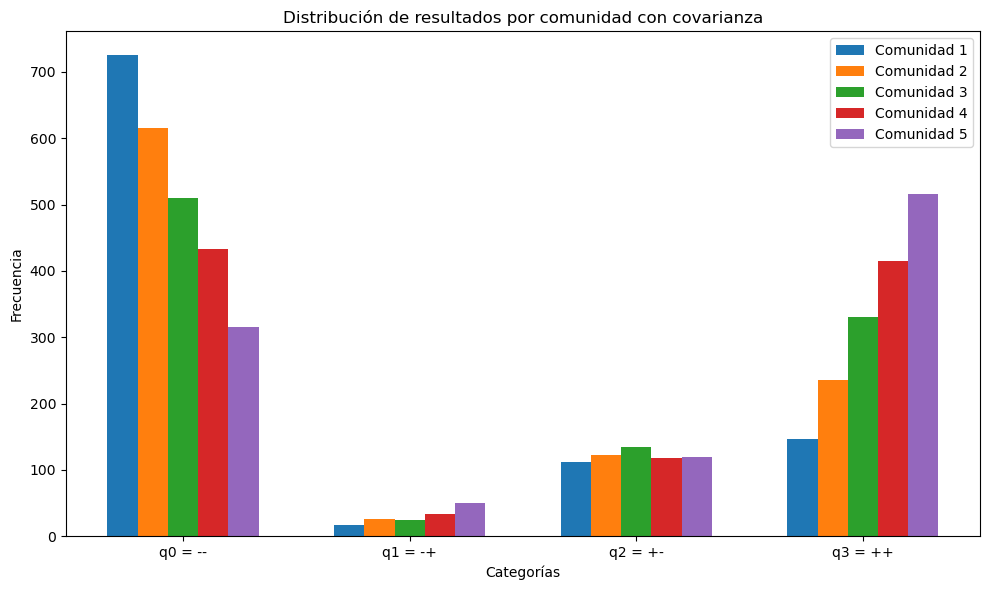

In [83]:
categorias = ["q0 = --", "q1 = -+", "q2 = +-", "q3 = ++"]
x = np.arange(len(categorias)) * 1.5

figura, eje = plt.subplots(figsize=(10, 6))

for indice, resultados_comunidad in enumerate(resultados_covarianza):
    eje.bar(
        x + indice * 0.2,
        resultados_comunidad,
        width=0.2,
        label=f"Comunidad {indice+1}",
    )

eje.set_xticks(x + 0.4)
eje.set_xticklabels(categorias)
eje.set_xlabel("Categorías")
eje.set_ylabel("Frecuencia")
eje.set_title("Distribución de resultados por comunidad con covarianza")
eje.legend()

plt.tight_layout()
plt.show()

In [84]:
with pm.Model() as hui_walter_model_2:
    # Priors para prevalencia, sensibilidad y especificidad
    prevalencia = pm.Beta(
        "prevalencia", alpha=1, beta=1, shape=5, initval=[0.5] * 5
    )  # Una para cada comunidad
    sensibilidad = pm.Beta(
        "sensibilidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test
    especificidad = pm.Beta(
        "especificidad", alpha=1, beta=1, shape=2, initval=[0.8] * 2
    )  # Una para cada test

    # Probabilidades de las categorías en funcion de la prevalencia, sensibilidad y especificidad
    q0 = (
        prevalencia * (1 - sensibilidad[0]) * (1 - sensibilidad[1])
        + (1 - prevalencia) * especificidad[0] * especificidad[1]
    )
    q1 = prevalencia * (1 - sensibilidad[0]) * sensibilidad[1] + (
        1 - prevalencia
    ) * especificidad[0] * (1 - especificidad[1])
    q2 = (
        prevalencia * sensibilidad[0] * (1 - sensibilidad[1])
        + (1 - prevalencia) * (1 - especificidad[0]) * especificidad[1]
    )
    q3 = prevalencia * sensibilidad[0] * sensibilidad[1] + (1 - prevalencia) * (
        1 - especificidad[0]
    ) * (1 - especificidad[1])

    q = pm.Deterministic("q", pm.math.stack([q0, q1, q2, q3], axis=1))

    # Observaciones
    observaciones = pm.Multinomial(
        "observaciones", n=N, p=q, observed=np.array(resultados_covarianza)
    )

In [85]:
hui_walter_model_2

In [86]:
with hui_walter_model_2:
    trace_cov = pm.sample(
        1000,
        return_inferencedata=True,
        target_accept=0.95,
    )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prevalencia, sensibilidad, especificidad]


c:\Users\Damian\miniconda3\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 66 seconds.


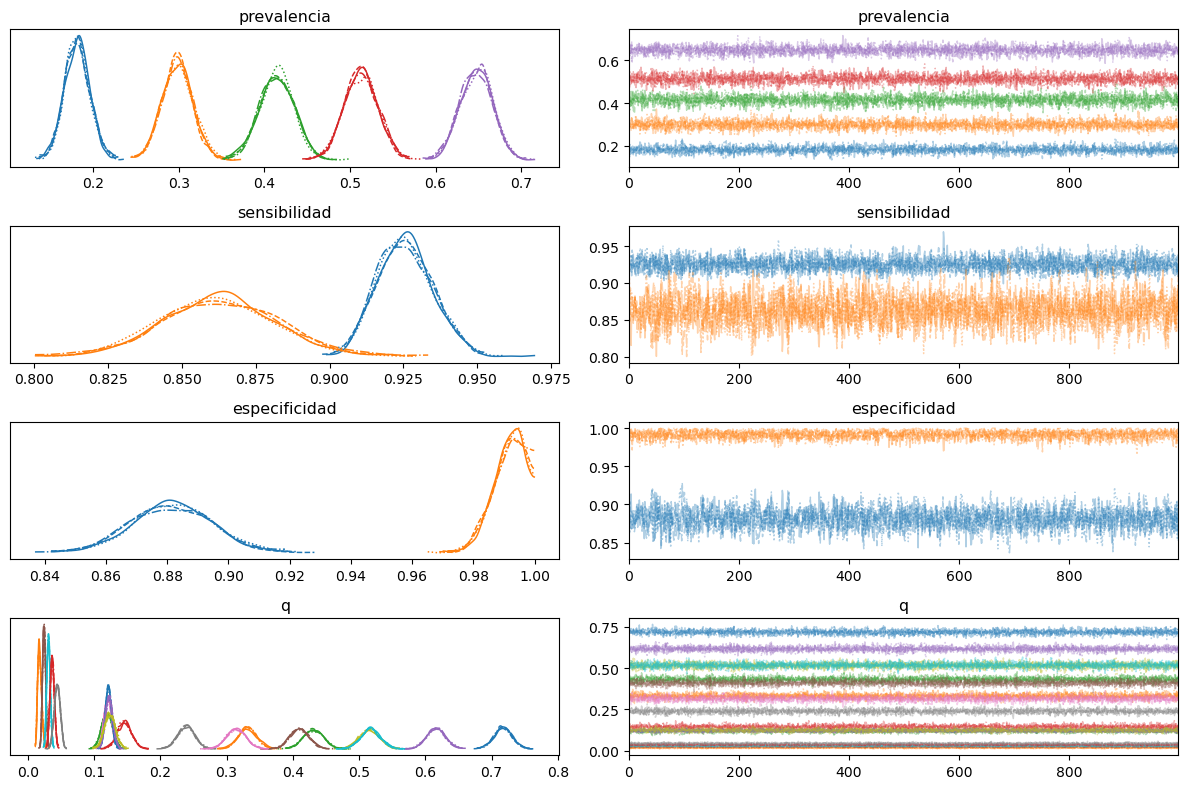

In [87]:
az.plot_trace(trace_cov, combined=False)
plt.tight_layout()

In [88]:
az.summary(trace_cov, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
prevalencia[0],0.181,0.015,0.152,0.211,0.0,0.0,2605.0,2717.0,1.0
prevalencia[1],0.299,0.018,0.264,0.335,0.0,0.0,2755.0,2899.0,1.0
prevalencia[2],0.415,0.020,0.374,0.453,0.0,0.0,2525.0,2839.0,1.0
prevalencia[3],0.513,0.020,0.475,0.551,0.0,0.0,2733.0,2601.0,1.0
prevalencia[4],0.648,0.019,0.608,0.682,0.0,0.0,2648.0,2672.0,1.0
sensibilidad[0],0.926,0.009,0.908,0.944,0.0,0.0,2431.0,2814.0,1.0
sensibilidad[1],0.863,0.019,0.824,0.900,0.0,0.0,1756.0,2080.0,1.0
especificidad[0],0.882,0.013,0.856,0.908,0.0,0.0,1801.0,2177.0,1.0
especificidad[1],0.992,0.005,0.982,1.000,0.0,0.0,1752.0,1557.0,1.0
"q[0, 0]",0.717,0.014,0.690,0.744,0.0,0.0,3864.0,2576.0,1.0


In [89]:
prevalencia_inferida = trace_cov.posterior["prevalencia"].mean(dim=["chain", "draw"])
sensibilidad_inferida = trace_cov.posterior["sensibilidad"].mean(dim=["chain", "draw"])
especificidad_inferida = trace_cov.posterior["especificidad"].mean(dim=["chain", "draw"])

hdi_prevalencia = az.hdi(trace_cov, var_names="prevalencia", hdi_prob=0.95)["prevalencia"]
hdi_sensibilidad = az.hdi(trace_cov, var_names="sensibilidad", hdi_prob=0.95)[
    "sensibilidad"
]
hdi_especificidad = az.hdi(trace_cov, var_names="especificidad", hdi_prob=0.95)[
    "especificidad"
]

valores_reales_prevalencia = np.array([0, 0.15, 0.3, 0.45, 0.7])
valores_reales_sensibilidad = np.array([0.8, 0.75])
valores_reales_especificidad = np.array([0.75, 0.85])

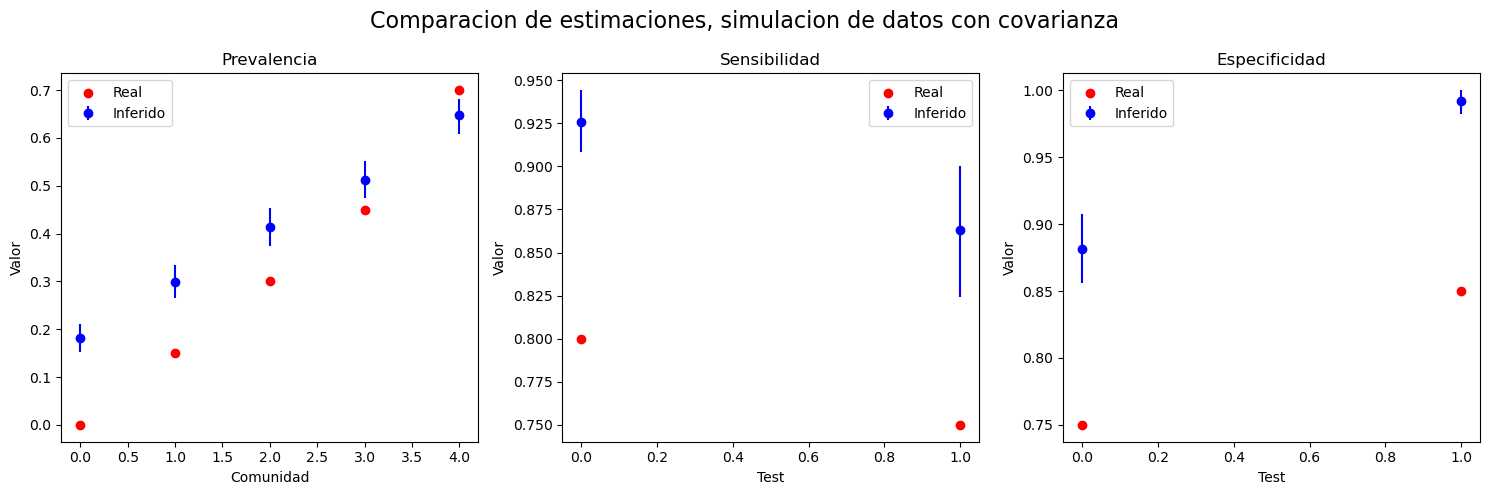

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Comparacion de estimaciones, simulacion de datos con covarianza", fontsize=16)

# Prevalencia
axs[0].errorbar(
    range(len(prevalencia_inferida)),
    prevalencia_inferida,
    yerr=[
        prevalencia_inferida - hdi_prevalencia[:, 0],
        hdi_prevalencia[:, 1] - prevalencia_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[0].scatter(
    range(len(valores_reales_prevalencia)),
    valores_reales_prevalencia,
    color="red",
    label="Real",
)
axs[0].set_title("Prevalencia")
axs[0].set_xlabel("Comunidad")
axs[0].set_ylabel("Valor")
axs[0].legend()

# Sensibilidad
axs[1].errorbar(
    range(len(sensibilidad_inferida)),
    sensibilidad_inferida,
    yerr=[
        sensibilidad_inferida - hdi_sensibilidad[:, 0],
        hdi_sensibilidad[:, 1] - sensibilidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[1].scatter(
    range(len(valores_reales_sensibilidad)),
    valores_reales_sensibilidad,
    color="red",
    label="Real",
)
axs[1].set_title("Sensibilidad")
axs[1].set_xlabel("Test")
axs[1].set_ylabel("Valor")
axs[1].legend()

# Especificidad
axs[2].errorbar(
    range(len(especificidad_inferida)),
    especificidad_inferida,
    yerr=[
        especificidad_inferida - hdi_especificidad[:, 0],
        hdi_especificidad[:, 1] - especificidad_inferida,
    ],
    fmt="o",
    label="Inferido",
    color="blue",
)
axs[2].scatter(
    range(len(valores_reales_especificidad)),
    valores_reales_especificidad,
    color="red",
    label="Real",
)
axs[2].set_title("Especificidad")
axs[2].set_xlabel("Test")
axs[2].set_ylabel("Valor")
axs[2].legend()

plt.tight_layout()
plt.show()

#### 2.1.5 conclusiones

En el caso de los tests que generan diagnósticos de manera independiente, el modelo Hui-Walter permite inferir parámetros como la sensibilidad, especificidad y prevalencia sin necesidad de conocer el estado real de las personas (infectadas/no infectadas).  Para esto se debe cumplir la suposicion de independencia entre los tests y contar con una cantidad de datos suficiente para que la inferencia sea robusta.

De manera analoga se podria crear un detector de mentiras y verdades entre medios de comunicacion que mienten de manera aleatoria de manera independiente.

En ambos casos la supusicion de independencia es clave, como se pudo ver en el ejemplo donde se introdujo covarianza entre los tests y no se pudieron inferir correctamente los parametros.
